In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import img_as_float
import scipy
from sklearn.model_selection import train_test_split

In [2]:
image =imread('C:/Users/Arcry/SkillBox/ML_HSE/files/parrots.jpg')

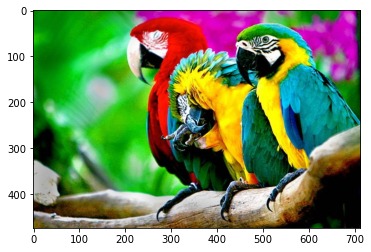

In [3]:
import pylab
pylab.imshow(image)

In [8]:
img = img_as_float(image)

In [9]:
r = np.array([img[:,:,0].ravel()]).T
g = np.array([img[:,:,1].ravel()]).T
b = np.array([img[:,:,2].ravel()]).T
result = np.hstack((r,g))
result = np.hstack((result,b))

In [10]:
result

array([[0.01568627, 0.49411765, 0.01960784],
       [0.01176471, 0.49019608, 0.01568627],
       [0.00784314, 0.49411765, 0.00784314],
       ...,
       [0.02352941, 0.09019608, 0.11764706],
       [0.08235294, 0.16078431, 0.20392157],
       [0.08627451, 0.15686275, 0.23529412]])

In [13]:
from sklearn.cluster import KMeans

In [24]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

In [14]:
w, h, d = original_shape = tuple(img.shape)
assert d == 3

In [34]:
import time
from tqdm import tqdm

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:52<00:00,  8.61s/it]


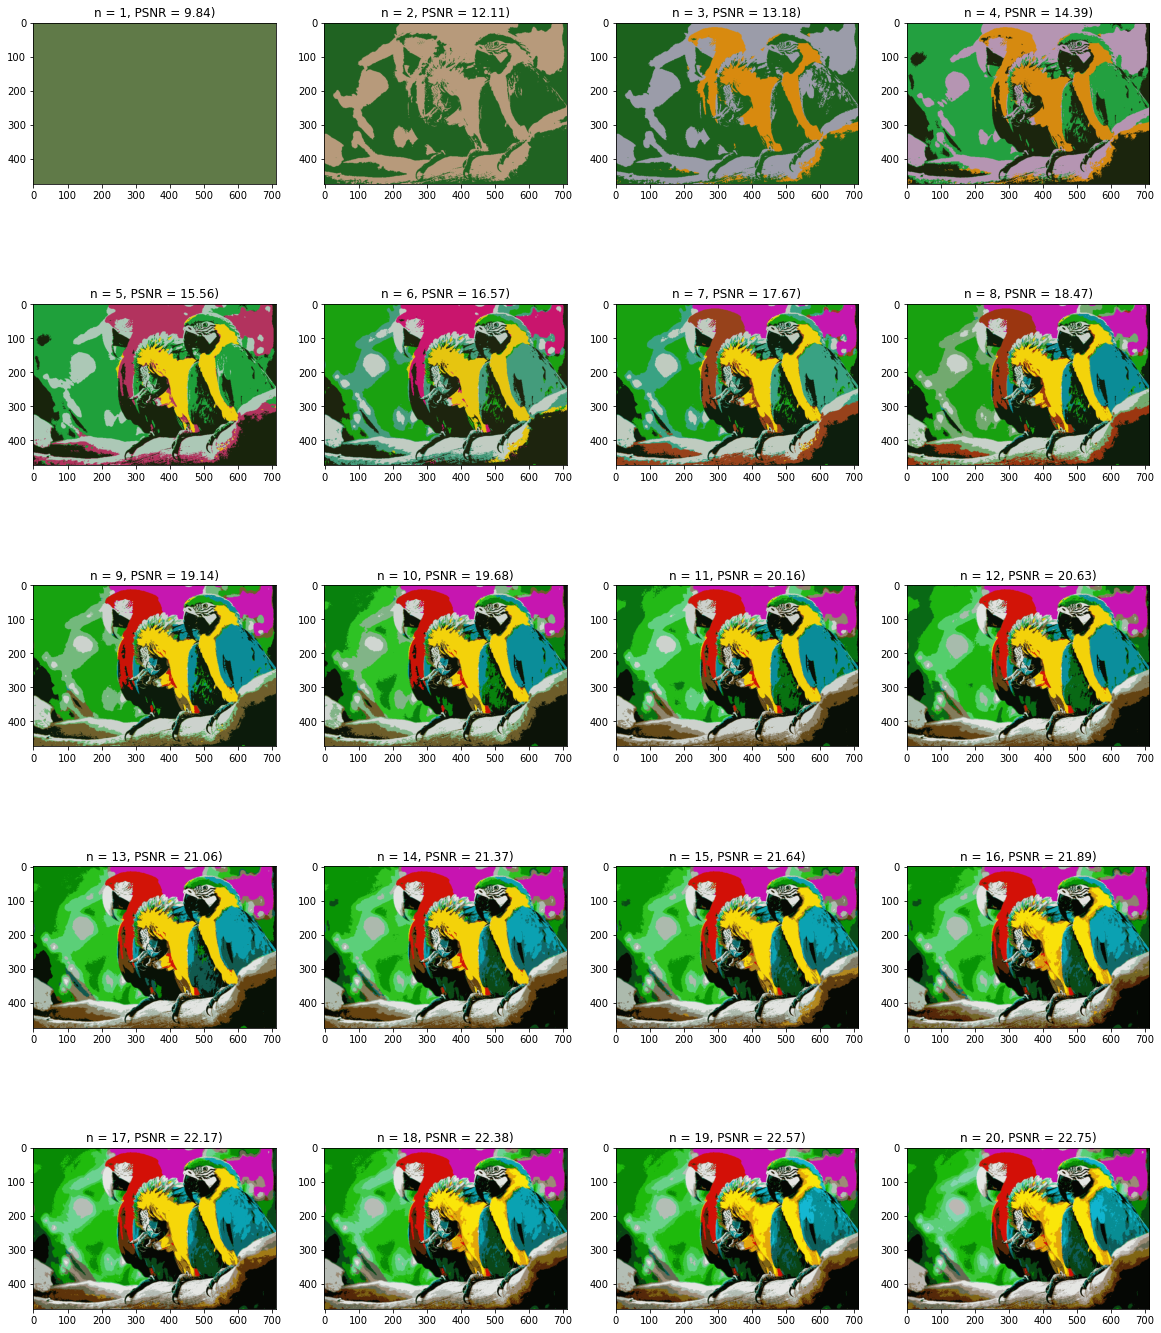

In [37]:
fig, axs = plt.subplots(5, 4, figsize=(20, 25))
for i, ax in tqdm(zip(range(1, 21), axs.flatten()), total= 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=241)
    kmeans.fit(result)
    labels = kmeans.predict(result)
    image_pred = recreate_image(kmeans.cluster_centers_, labels, w, h)
    psnr = 10 * np.log10(1.0 / np.mean((img - image_pred) ** 2))
    ax.set_title(f'n = {i}, PSNR = {round(psnr, 2)}')
    ax.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    time.sleep(1)